In [1]:
# pip install torch torchvision matplotlib numpy

# Project Details

## Understanding VKD (Virtual Knowledge Distillation)

To understand VKDs we need to understand the following concepts/algorithms in the order mentioned:

1. **Knowledge Distillation (KD)**
   - **Definition**: Knowledge Distillation is a technique where a smaller model (student) is trained to mimic a larger, already trained model (teacher). The student learns to reproduce the output distributions (softened logits) of the teacher, which contains richer information than hard labels alone.
   - **Teacher Model**: This is the larger and typically more complex model that has already been trained on the task at hand. It provides the target outputs for the student.
   - **Student Model**: This is the smaller and less complex model that learns from the teacher’s outputs. The goal is for the student to reach or even exceed the teacher's performance but with less computational overhead.

2. **Conditional Generative Adversarial Network (CGAN)**
   - **Definition**: CGANs are a variant of the generative adversarial network that includes label information in both the generator and discriminator, guiding the image generation process. This helps in generating more specific outputs and enhances the quality of generation.
   - **Generator**: In CGANs, the generator learns to produce data that is not only realistic but also conditioned on certain labels, thus making the output controllable.
   - **Discriminator**: Works to distinguish between real and generated data, but also considers the class labels, making it conditioned as well.

3. **Virtual Knowledge Distillation (VKD)**
   - **Definition**: VKD involves using a CGAN alongside traditional knowledge distillation. The generator in a CGAN framework acts as an additional teacher by generating synthetic data that the student also learns from, thus employing both direct distillation from the main teacher and virtual knowledge through the generator.
   - **Utilization**: VKD utilizes the traditional KD by taking the softened outputs from the teacher and the CGAN framework by integrating synthetic data generation which the student also learns from. This dual approach provides a rich, diverse set of training signals to the student.

## Understanding the CIFAR-100 Dataset

1. **Overview/Nature/Features of Dataset Used**
   - CIFAR-100 is a well-known dataset used in computer vision for evaluating image recognition algorithms. The dataset comprises 60,000 32x32 color images equally divided into 100 classes, providing a substantial challenge for developing robust classification models.

2. **Detailed Description**
   - The CIFAR-100 dataset consists of 60,000 32x32 colour images in 100 classes, with 600 images per class. The 100 classes are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs). There are 50,000 training images and 10,000 test images. The meta file contains the label names of each class and superclass. **We will be training/predicting on fine labels not coarse labels.**

3. **Dataset Link**
   - [CIFAR-100 Dataset on Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100)

## Models Chosen (Different models chosen to demonstrate knowledge distillation)

1. **Teacher: ResNet-50**
   - Chosen for its moderately deep architecture, providing a rich source of knowledge for distillation.

2. **Student: ResNet-18**
   - A smaller and faster variant of ResNet, ideal for demonstrating the effectiveness of knowledge transfer from a more complex model.

3. **Note**
   - The choice of these models is to demonstrate the working, effectiveness, and reason for using VKDs to transfer knowledge. The teacher is significantly more powerful than the student, justifying the knowledge transfer.

## Generator and Discriminator

1. **Generator**
   - **Purpose**: The generator's role in this project is to create synthetic, yet plausible, data samples based on random noise and class labels, which are used to train the student model in the virtual knowledge distillation process.
   - **Architecture/Input/Output Shape**: Configured to take noise and label inputs, outputting data samples that mimic the distribution of the real training data in shape and complexity.

2. **Discriminator**
   - **Purpose**: The discriminator assesses whether the data generated by the generator is convincing (realistic) when compared to actual data from the dataset, thereby enhancing the generator's output over time.
   - **Architecture/Input/Output Shape**: Takes both real data and generated data as input, outputting classifications of 'real' or 'fake' for each sample.

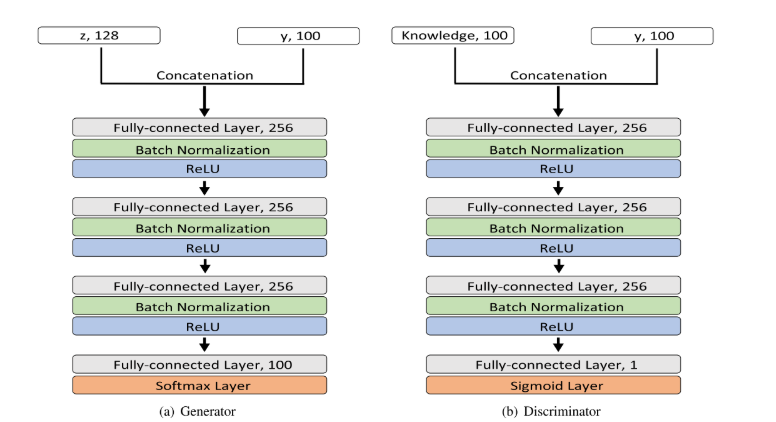

### Panel (a): Generator Architecture

The Generator's architecture is designed to produce synthetic data that mimics the real data's characteristics, conditioned on specific inputs.

1. **Inputs**:
   - **z, 128**: A noise vector of dimension 128. This random noise acts as a source of variability in the data generated.
   - **y, 100**: A label vector of dimension 100, representing one-hot encoded labels. This ensures that the generated data corresponds to specific classes in your dataset.

2. **Concatenation**:
   - The noise vector and label vector are concatenated. This combined vector feeds into the neural network, ensuring that the generated outputs are conditioned on both the random elements and the specific class labels.

3. **Neural Network Layers**:
   - **Fully-connected Layer, 256**: The first dense layer takes the concatenated vector and transforms it, followed by batch normalization and ReLU activation to stabilize the learning and add non-linearity.
   - The structure repeats with two more fully-connected layers, each followed by batch normalization and ReLU activation, to further refine the features.

4. **Output Layer**:
   - **Fully-connected Layer, 100**: This layer outputs a vector of size 100, which is passed through a softmax layer to create a probability distribution over the 100 classes. This output mimics the real data distribution conditioned on the input labels.

5. **Softmax Layer**:
   - The final output of the generator is a softmax layer that converts the logits from the last fully-connected layer into probabilities, representing a distribution over potential class labels.

### Panel (b): Discriminator Architecture

The Discriminator's architecture is designed to distinguish between real and generated (fake) data, providing a feedback mechanism to improve the generator.

1. **Inputs**:
   - **Knowledge, 100**: Real data or generated data input vector of dimension 100, representing features of images or other types of data.
   - **y, 100**: Label vector used for conditioning the discriminator, ensuring it takes into account the class information when making real vs. fake judgments.

2. **Concatenation**:
   - Similar to the generator, the knowledge and label vectors are concatenated to form the input to the neural network, allowing the discriminator to make informed decisions based on both data features and class labels.

3. **Neural Network Layers**:
   - **Fully-connected Layer, 256**: Processes the concatenated vector with batch normalization and ReLU activation to stabilize and add non-linearity to the discrimination process.
   - This is followed by two more similar layers (fully-connected + batch normalization + ReLU) to deepen the network and enhance its ability to differentiate complex patterns in data.

4. **Output Layer**:
   - **Fully-connected Layer, 1**: Outputs a single value that represents the probability of the input data being real.
   - **Sigmoid Layer**: Converts the output into a probability through a sigmoid activation, facilitating binary classification between real and fake data.


## Project's Final Workflow

* **Final Model Architecture**: Illustrate how the teacher model, student model, generator, and discriminator are interconnected. Highlight the data flow between these components, emphasizing how the student learns from both the teacher's output and the generator's synthetic output.

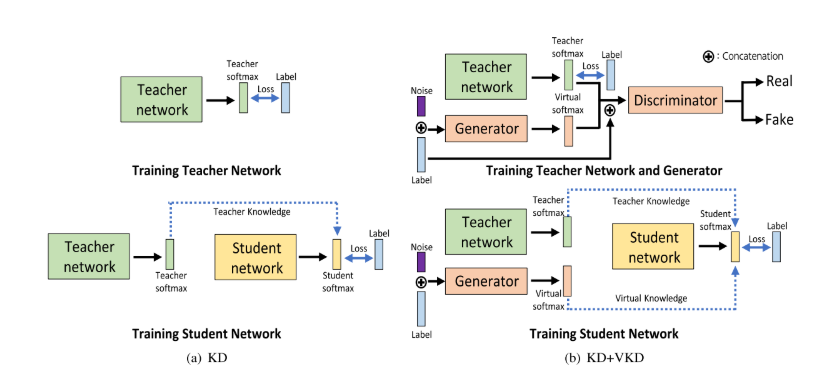

### Panel (a): KD (Knowledge Distillation)

This panel outlines the traditional knowledge distillation process where knowledge is transferred from a teacher network to a student network.

1. **Teacher Network**:
   - The teacher network, which is a pre-trained and typically more complex and powerful model, processes the input data and generates predictions (softmax outputs).
   - The outputs are used both for calculating the loss during the teacher's own training process (not shown in detail here) and as soft labels for training the student model.

2. **Student Network**:
   - The student network learns from the softened outputs (soft labels) of the teacher network.
   - This process involves the student model taking the same input data, generating its predictions, and comparing its softmax outputs against the teacher’s softened outputs through a loss function, effectively teaching the student to mimic the teacher’s predictions.

### Panel (b): KD+VKD (Knowledge Distillation + Virtual Knowledge Distillation)

This panel expands the KD process by incorporating a Generative Adversarial Network (GAN) setup, adding a generator and a discriminator into the training loop, enabling the VKD process.

1. **Teacher Network**:
   - Functions similarly to panel (a), where the teacher processes input data and outputs are used for traditional KD.

2. **Generator**:
   - Generates synthetic data (virtual knowledge) conditioned on noise and label inputs. This synthetic data is designed to mimic the characteristics of the data the teacher network processes, thereby creating additional training data for the student.
   - The output from the generator is fed into both the discriminator and the student network.

3. **Discriminator**:
   - The discriminator’s role in this setup is to differentiate between real data outputs (from the teacher network) and the synthetic (fake) data outputs (from the generator). This process helps in refining the generator's ability to produce realistic outputs.

4. **Student Network**:
   - Receives both real knowledge (from the teacher network) and virtual knowledge (from the generator).
   - The student learns from the real data by traditional KD as explained in panel (a) and also from the synthetic data through VKD. The student's outputs are compared against both the teacher's softened outputs and the generator’s synthetic outputs to calculate losses and update the student’s learning.

### Final Model’s Architecture and Workflow Integration:

- The diagram visually represents the flow of data and learning signals between different components:
  - **Real Data**: Flows from the teacher to the student for direct knowledge transfer.
  - **Synthetic Data**: Generated by the generator, judged by the discriminator, and used to train the student indirectly.
  - **Learning Process**: Involves both direct and indirect paths where the student model learns from the real outputs and the synthetic outputs, enhancing its ability to generalize from both real and artificially augmented data scenarios.


# 1. Loading and Preparing Dataset

## Imports

In [2]:
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR100
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch

## Loading and Pre-Processing Dataset

CIFAR-100 images are RGB with pixel values in the range [0,255] (R : 0-255, G: 0-255, B : 0-255). Normalize them to [0,1], so neurons can process these values since neurons can only output/accept values in the range of 0-1 (boundaries inclusive) and then to the standard normal distribution using the dataset's mean and standard deviation.

In [ ]:
# Normalization values for CIFAR-100 dataset
# These are pre-computed means and standard deviations for each of the three color channels (RGB).
mean = [0.5071, 0.4867, 0.4408]  # Mean for normalization
std = [0.2675, 0.2565, 0.2761]   # Standard deviation for normalization

# Define transformations for the training dataset
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  # Apply random cropping to images with padding of 4 pixels on each side.
    transforms.RandomHorizontalFlip(),     # Apply random horizontal flipping to augment the dataset and reduce overfitting.
    transforms.ToTensor(),                 # Convert image data from PIL format to PyTorch tensors (C x H x W format).
    transforms.Normalize(mean, std)        # Normalize tensor values to have specific mean and std deviation for each channel.
])

# Define transformations for the testing dataset
transform_test = transforms.Compose([
    transforms.ToTensor(),                 # Convert image data from PIL format to PyTorch tensors without augmentation.
    transforms.Normalize(mean, std)        # Normalize tensor values using the same mean and std as the training set.
])

CIFAR-100 comes pre-split in training and testing dataset

In [ ]:
# Loading the CIFAR-100 datasets with specified transformations for training and testing.
# CIFAR100 is a dataset of 100 classes, each containing 600 images of 32x32 pixels in color.
train_dataset = CIFAR100(
    root='./data',            # Directory where the dataset will be stored. It will be downloaded here if not present.
    train=True,               # Indicates this is the training dataset.
    download=True,            # Download the dataset from the internet if it's not available at 'root'.
    transform=transform_train # Apply the specified transformations defined earlier for the training set.
)
test_dataset = CIFAR100(
    root='./data',            # Directory where the dataset is stored.
    train=False,              # Indicates this is the testing dataset.
    download=True,            # Download the dataset from the internet if it's not available at 'root'.
    transform=transform_test  # Apply the specified transformations defined earlier for the testing set.
)

# Setting up batch size for the data loaders
batch_size = 128  # Number of samples in each batch to be loaded.

# Create data loaders to iterate over the training and testing dataset
# DataLoader handles the creation of batches and shuffling of the data, making it ready for training the model.
train_loader = DataLoader(
    train_dataset,         # The dataset to load data from.
    batch_size=batch_size, # Number of samples per batch.
    shuffle=True,          # Shuffle the data at every epoch to prevent the model from memorizing the order of samples.
    num_workers=2,         # Number of subprocesses to use for data loading. More workers can increase the loading speed.
    drop_last=True         # Drop the last incomplete batch if the dataset size is not divisible by the batch size.
)
test_loader = DataLoader(
    test_dataset,          # The dataset to load data from.
    batch_size=batch_size, # Number of samples per batch.
    shuffle=False,         # No need to shuffle the test data.
    num_workers=2,         # Number of subprocesses to use for data loading.
    drop_last=True         # Drop the last incomplete batch.
)


100%|██████████| 169M/169M [00:12<00:00, 13.1MB/s]


Extracting ./data/cifar-100-python.tar.gz to ./data
Files already downloaded and verified


Function to denormalize image pixels' RGB values

In [ ]:
def imshow(img):
    # Denormalizes the image:
    # Reverse the mean and std deviation adjustments to restore the image to its original color representation.
    img = img * torch.tensor(std).view(3, 1, 1) + torch.tensor(mean).view(3, 1, 1)

    # Clipping the image pixel values:
    # Ensures that any value that fell below 0 or above 1 during processing is brought back within this range.
    # This is important because plt.imshow expects pixel values in the range [0, 1] for floats or [0, 255] for integers.
    img = np.clip(img.numpy(), 0, 1)

    # Rearranging the image dimensions:
    # Transposes the tensor from (C, H, W) format to (H, W, C) format suitable for displaying with plt.imshow.
    plt.imshow(np.transpose(img, (1, 2, 0)))

    # Display the image:
    # Displays the image on a matplotlib plot with no axis marks.
    plt.show()

Testing if normalization and denormalization are set up correctly:
* If set up correctly, the first image loads
* If not set up correctly, first image will not load

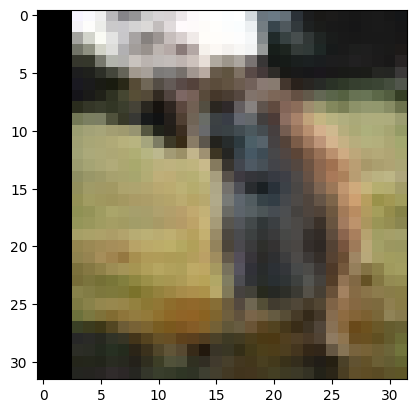

Label: 38


In [ ]:
# Display a few images from the training dataset
# Retrieve an iterator for the training data loader
data_iter = iter(train_loader)

# Fetch the next batch of images and labels using the 'next' function from the iterator
# This allows for sequential access to batches without manually indexing into the dataset.
images, labels = next(data_iter)  # Retrieves one batch of images and their corresponding labels

# Display the first image in the batch using the custom 'imshow' function defined earlier
# This function denormalizes and displays the image using matplotlib.
imshow(images[0])  

# Print the label of the first image in the batch
# This provides a simple text output to identify the class/category of the image displayed.
print(f"Label: {labels[0]}")  # Output the label of the first image to verify data and for information purposes.

Note: The images generated are so pixelated so how will our convolutional neural network (ResNet-50) even be able to train itself properly. The answer to that lies in how neural network's functionaing, arhcitecture, and how it learns.
1. Firstly, since the neural network is trained on images that have low pixel quality, it learns on this dataset as well via the corresponding image labels. Imagine seeing only a pixelated wolf for your entire life; you would be pretty confused if you saw an unpixelated 4k real world wolf since according to your knowledge, wolfs are these pixelated furry animals and whenever a pixelated picture of a wolf shows up, while everyone else is confused about what's in the image, you can eassily tell that its a wolf.
2. Additionlly, this pixelation has several benefits such as:
* Lower computational power required during inference and training
* Real world pictures often show objects from far away and zooming in causes context/image information to be lost since images get pixelated

# 2. Training Teacher Model (ResNet-50)

## Imports

In [7]:
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim

## Loading and Training Model

#### Load pretrained model (resnet50_cifar100.pth)
* (Note that model "resnet50_cifar100.pth" was trained when this notebook was being created, model training steps can be seen in the dropdown codeblocks collection labeled "Load Untrained Model")

In [ ]:
# Set the computation device based on CUDA availability
# This line checks if CUDA (NVIDIA GPU support) is available in your setup and uses it; otherwise, it falls back to using the CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Define the model architecture
# Here, 'models.resnet50' refers to the ResNet-50 model architecture.
# 'pretrained=False' means we are not loading the pretrained weights provided by PyTorch, intending to use custom weights instead.
resnet50 = models.resnet50(pretrained=False)

# Modify the fully connected (fc) layer of the ResNet-50 to match the number of classes in CIFAR-100
# CIFAR-100 has 100 different classes, so we need the output layer to have 100 neurons.
num_classes = 100
resnet50.fc = torch.nn.Linear(resnet50.fc.in_features, num_classes)  # Adjusting the output layer to 100 classes.

# Load the saved model state
# 'torch.load' loads the model checkpoint from the specified path, with 'map_location' specifying the device to map the model to.
checkpoint = torch.load('resnet50_cifar100.pth', map_location=device)

# Load the state dictionary into the model
# The state dictionary contains all the model weights. This line loads these weights into the configured 'resnet50' model structure.
resnet50.load_state_dict(checkpoint)

# Move the model to the specified device (GPU or CPU)
# This step is crucial for leveraging GPU computation, as it ensures that both the model and data are on the same device during training.
resnet50 = resnet50.to(device)

# Confirmation message to ensure the model is loaded and the script is executed without any errors.
print("Model loaded successfully!")

Model loaded successfully!


<ipython-input-9-50026c1c0726>:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load('resnet50_cifar100.pth', map_location=device)


#### Load Untrained Model (ResNet-50)
* (Note that training ResNet-50 on Google's T4-GPU takes around 50 mins given that epochs=100, dataset=CIFAR-100, and the output layer has 100 neurons)

In [ ]:
# Load the ResNet-50 model
# The ResNet-50 architecture is initialized without pretrained weights because we are adapting it for a different dataset.
resnet50 = models.resnet50(pretrained=False)

# Modify the fully connected (fc) layer to match the number of classes in CIFAR-100
# CIFAR-100 dataset consists of 100 different classes, requiring the final output layer of the model to have 100 output neurons.
# We adjust the fully connected layer's output features to 100. This changes the model's final layer to output predictions for 100 classes.
resnet50.fc = nn.Linear(resnet50.fc.in_features, 100)  # Set the output of the fc layer to 100 to correspond with the 100 classes of CIFAR-100.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Switching to CUDA (Parallel Computing in the GPU) if GPU is available

In [ ]:
# Configure device setting for the model
# This code checks if a CUDA-compatible GPU is available for Torch operations; if not, it defaults to using the CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the ResNet-50 model to the selected device
# This operation is crucial for performance efficiency. By moving the model to a GPU (if available), 
# it ensures that all computations for the model are optimized for speed. This is particularly important for training on large datasets.
resnet50 = resnet50.to(device)

Setting up hyperparameters for our model's training

In [ ]:
# Define the loss function
# CrossEntropyLoss is commonly used for multi-class classification tasks in neural networks.
# It combines LogSoftmax and NLLLoss (Negative Log Likelihood Loss) in one single class.
criterion = nn.CrossEntropyLoss()  # Suitable for classification with 'C' classes where 'C >= 2'

# Define the optimizer
# Stochastic Gradient Descent (SGD) is used to update model parameters (weights and biases) during training.
# 'lr' is the learning rate which controls the step size during gradient descent.
# 'momentum' is used to accelerate gradients vectors in the correct directions, thus leading to faster converging.
# 'weight_decay' is a regularization term (L2 penalty) to discourage large weights in the model to prevent overfitting.
optimizer = optim.SGD(resnet50.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)

# Setup the learning rate scheduler
# The StepLR scheduler decreases the learning rate by a factor of gamma every step_size epochs.
# Reducing the learning rate helps the model to fine-tune and settle into smaller and smaller areas of the loss landscape.
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)  
# This approach (big steps initially, smaller steps later) is analogous to taking broader searches in the beginning of optimization
# and finer searches as we approach potential minima areas, improving the precision of the learning process.

* def train_model trains the model
* def evaluate_model evaluated model performance

In [ ]:
def train_model(model, train_loader, criterion, optimizer, scheduler, num_epochs):
    # Training the model over a specified number of epochs.
    for epoch in range(num_epochs):
        model.train()  # Sets the model to training mode (affects dropout and batch normalization).
        running_loss = 0.0

        # Loop over batches of data in the train_loader.
        for images, labels in train_loader:
            # Transfer images and labels to the GPU if available.
            images, labels = images.to(device), labels.to(device)

            # Forward pass: Compute predicted outputs by passing images to the model.
            outputs = model(images)
            loss = criterion(outputs, labels)  # Calculate the batch's loss using the defined criterion.

            # Backward pass and optimization.
            optimizer.zero_grad()  # Clear the gradients before they are accumulated by default.
            loss.backward()  # Compute gradient of the loss with respect to model parameters.
            optimizer.step()  # Perform a single optimization step (parameter update).

            running_loss += loss.item()  # Update running loss

        # Step the scheduler to adjust the learning rate.
        scheduler.step()

        # Print statistics after each epoch.
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

def evaluate_model(model, test_loader):
    model.eval()  # Sets the model to evaluation mode (impact on dropout and batch normalization).
    correct = 0
    total = 0

    # Disabling gradient calculation is useful for inference, reduces memory consumption and speeds up computations.
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability as the predicted label.
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Calculate the accuracy based on correct predictions.
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return accuracy

Training the model

In [ ]:
# Specify the number of epochs to train the model
# This value may need to be adjusted based on computational resources available and desired training depth.
num_epochs = 100

# Train the teacher model
# Calls the 'train_model' function with the model, data loader, loss function, optimizer, scheduler, and number of epochs.
# This will run the training process for the specified epochs, printing loss at each epoch.
train_model(resnet50, train_loader, criterion, optimizer, scheduler, num_epochs)

# Evaluate the teacher model
# After training, evaluate the model's performance on the test dataset using the 'evaluate_model' function.
# It will print the accuracy of the model which helps in understanding how well the model performs on unseen data.
evaluate_model(resnet50, test_loader)

# Save the trained model's parameters
# Saves the model state dictionary, which contains all the model parameters, to a file.
# This allows the model to be reloaded at a later date to perform predictions or continue training.
torch.save(resnet50.state_dict(), "resnet50_cifar100.pth")

Epoch [1/100], Loss: 5.4339
Epoch [2/100], Loss: 4.2185
Epoch [3/100], Loss: 3.9530
Epoch [4/100], Loss: 3.7245
Epoch [5/100], Loss: 3.5234
Epoch [6/100], Loss: 3.3608
Epoch [7/100], Loss: 3.2190
Epoch [8/100], Loss: 3.1134
Epoch [9/100], Loss: 3.0098
Epoch [10/100], Loss: 2.9411
Epoch [11/100], Loss: 2.8794
Epoch [12/100], Loss: 2.7889
Epoch [13/100], Loss: 2.7192
Epoch [14/100], Loss: 2.6475
Epoch [15/100], Loss: 2.5791
Epoch [16/100], Loss: 2.5245
Epoch [17/100], Loss: 2.4631
Epoch [18/100], Loss: 2.4122
Epoch [19/100], Loss: 2.3835
Epoch [20/100], Loss: 2.3254
Epoch [21/100], Loss: 2.3007
Epoch [22/100], Loss: 2.2612
Epoch [23/100], Loss: 2.2285
Epoch [24/100], Loss: 2.2098
Epoch [25/100], Loss: 2.1834
Epoch [26/100], Loss: 2.1582
Epoch [27/100], Loss: 2.1401
Epoch [28/100], Loss: 2.1141
Epoch [29/100], Loss: 2.1023
Epoch [30/100], Loss: 2.0840
Epoch [31/100], Loss: 1.6209
Epoch [32/100], Loss: 1.4362
Epoch [33/100], Loss: 1.3736
Epoch [34/100], Loss: 1.3100
Epoch [35/100], Loss: 1

# 3. Creating and Training Generator (G) and Discriminator (D)

## Imports

In [10]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR100

## Loading Generator (G)

### Load pre-trained Generator (generator_vkd_3.pth)

Defining G

In [ ]:
class Generator(nn.Module):
    """
    A Generator class that inherits from nn.Module, designed to generate data resembling the training data.
    """
    def __init__(self, noise_dim, label_dim, hidden_dim, output_dim):
        """
        Initialize the Generator with specific dimensions for noise, labels, hidden layers, and output.

        Args:
        noise_dim (int): Dimensionality of the noise vector.
        label_dim (int): Number of unique labels to embed.
        hidden_dim (int): Size of the hidden layers.
        output_dim (int): Dimensionality of the output data (e.g., number of features in the generated output).
        """
        super(Generator, self).__init__()

        # Embedding layer for categorical labels
        self.label_embedding = nn.Embedding(label_dim, label_dim)  # Maps each label to a high-dimensional vector.

        # Define the neural network layers
        self.model = nn.Sequential(
            # First layer takes a combined input of noise and label embeddings.
            nn.Linear(noise_dim + label_dim, hidden_dim),  # Combines noise and label dimensions into the first hidden layer.
            nn.BatchNorm1d(hidden_dim),  # Normalizes the output of the first linear layer for stability.
            nn.ReLU(),  # Activation function to add non-linearity, helping the network learn complex patterns.

            # Second hidden layer
            nn.Linear(hidden_dim, hidden_dim),  # Further processes data within the same hidden dimension.
            nn.BatchNorm1d(hidden_dim),  # Normalization step repeated for stabilization.
            nn.ReLU(),  # Non-linear activation function.

            # Third hidden layer, similar structure to maintain depth
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),

            # Output layer
            nn.Linear(hidden_dim, output_dim),  # Final transformation to the output dimension.
            nn.Softmax(dim=1)  # Softmax to output a probability distribution over possible output features.
        )

    def forward(self, noise, labels):
        """
        Defines the forward pass of the generator.

        Args:
        noise (Tensor): Random noise to generate data.
        labels (Tensor): Labels for conditional generation.

        Returns:
        Tensor: Generated data matching the distribution of the training set.
        """
        # Embed labels into a dense representation and concatenate with noise
        label_embed = self.label_embedding(labels)  # Converts labels into dense vectors.
        input_data = torch.cat((noise, label_embed), dim=1)  # Concatenates noise and label embeddings along feature dimension.

        # Pass the concatenated vector through the model
        return self.model(input_data)  # Returns the generated data based on the learned distribution.

In [ ]:
# Define the generator's parameters
noise_dim = 128  # Dimensionality of the random noise vector.
label_dim = 100  # Number of unique labels, for which embeddings will be learned.
hidden_dim = 256  # Size of the hidden layers in the generator model.
output_dim = 100  # The output dimension of the generator, representing the generated data's feature space.

# Initialize the Generator with specified parameters
# This reinitialization is typical when starting a new training session or altering the model's architecture.
generator = Generator(noise_dim, label_dim, hidden_dim, output_dim)

# Set the computation device based on CUDA availability
# This line checks if CUDA (GPU support) is available, and sets the device to GPU if possible, otherwise CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the previously saved model's state
# This involves loading the model weights saved in a file, typically after a previous training session.
generator.load_state_dict(torch.load("generator_vkd_3.pth", map_location=device))

# Move the model to the specified device
# This step ensures that the model operations are performed on the right device (GPU or CPU), which is crucial for performance.
generator = generator.to(device)

### Load un-trained Generator (Create and train generator from scratch, takes around 40 mins on Google Colab's T4 GPU with epochs=50, batch_size=128)

#### Defining G and D

In [ ]:
class Generator(nn.Module):
    """
    Generator class that creates synthetic data from noise and label inputs using a series of neural network layers.
    Inherits from nn.Module, which is the base class for all neural network modules in PyTorch.
    """
    def __init__(self, noise_dim, label_dim, hidden_dim, output_dim):
        """
        Initialize the Generator with layers and embeddings based on specified dimensions.
        
        Args:
        noise_dim (int): Dimension of the input noise vector.
        label_dim (int): Number of unique labels, used to create embeddings.
        hidden_dim (int): Size of the hidden layers within the neural network.
        output_dim (int): Dimension of the output data, i.e., size of the generated data vector.
        """
        super(Generator, self).__init__()
        # Embedding layer to transform label indices into dense vectors of fixed size.
        self.label_embedding = nn.Embedding(label_dim, label_dim)

        # Sequential container for the neural network layers.
        self.model = nn.Sequential(
            # First layer: Linear transformation that combines noise and label embeddings.
            nn.Linear(noise_dim + label_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),  # Batch normalization to stabilize learning.
            nn.ReLU(),  # ReLU activation function for non-linearity.

            # Second layer: Similar to the first but operates within the hidden dimension space.
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),

            # Third layer: Replicates the structure of the second to deepen the network.
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),

            # Output layer: Produces the final output vector.
            nn.Linear(hidden_dim, output_dim),
            nn.Softmax(dim=1)  # Softmax to normalize the output to a probability distribution across features.
        )

    def forward(self, noise, labels):
        """
        Forward pass of the generator: takes noise and labels, generates synthetic data.

        Args:
        noise (Tensor): Random noise vector.
        labels (Tensor): Vector of labels, which are used to condition the data generation.

        Returns:
        Tensor: The generated synthetic data.
        """
        # Embed the labels into dense vectors and concatenate with noise.
        label_embed = self.label_embedding(labels)  # Convert label indices to embeddings.
        input_data = torch.cat((noise, label_embed), dim=1)  # Concatenate noise and label embeddings.

        # Pass the concatenated inputs through the network to generate data.
        return self.model(input_data)

In [ ]:
class Discriminator(nn.Module):
    """
    Discriminator class for a GAN, designed to classify input data as real or fake based on the data itself and associated labels.
    Inherits from nn.Module, which is the base class for all neural network modules in PyTorch.
    """
    def __init__(self, input_dim, label_dim, hidden_dim):
        """
        Initialize the Discriminator with specified input dimensions, label dimensions, and hidden layer size.
        
        Args:
        input_dim (int): Dimension of the input data (e.g., number of features in each data sample).
        label_dim (int): Number of unique labels, which the discriminator uses to condition its decision.
        hidden_dim (int): Size of the hidden layers within the neural network.
        """
        super(Discriminator, self).__init__()
        # Embedding layer for labels. This converts discrete label indices into dense embeddings, 
        # which can be concatenated with the input data to provide conditional context.
        self.label_embedding = nn.Embedding(label_dim, label_dim)

        # Define the sequence of neural network layers.
        self.model = nn.Sequential(
            # First layer processes the concatenated input and label embedding.
            nn.Linear(input_dim + label_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),  # Normalizes the output to improve training stability and performance.
            nn.ReLU(),  # Non-linear activation function to allow network to learn complex patterns.

            # Second layer: processes the output of the first layer further.
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),

            # Third layer: similar to previous, it helps in refining the discriminative capability of the network.
            nn.Linear(hidden_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),

            # Output layer that reduces the processed features to a single value, representing the classification.
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()  # Sigmoid activation to map the output to a probability [0, 1], indicating real or fake.
        )

    def forward(self, knowledge, labels):
        """
        Forward pass of the discriminator, which classifies input data as real or fake.

        Args:
        knowledge (Tensor): Real or synthetic data that the discriminator needs to classify.
        labels (Tensor): Corresponding labels for the data, used for conditional discrimination.

        Returns:
        Tensor: A single probability value for each input data point, indicating its likelihood of being real.
        """
        # Convert label indices to dense vector embeddings.
        label_embed = self.label_embedding(labels)
        # Concatenate the input data (knowledge) with the label embeddings.
        input_data = torch.cat((knowledge, label_embed), dim=1)
        # Pass the concatenated data through the model to obtain the probability of being real.
        return self.model(input_data)

#### Initializing G and D

In [ ]:
# Hyperparameters
noise_dim = 128       # Dimension of the noise vector z, used as input to the generator.
label_dim = 100       # Number of unique labels or classes in the dataset (e.g., CIFAR-100).
hidden_dim = 256      # Size of the hidden layers within both the generator and discriminator networks.
output_dim = 100      # Dimensionality of the generator's output, typically matching the number of classes.
input_dim = 100       # Dimension of the input to the discriminator, matching the generator's output dimension.

# Initialize the generator and discriminator models, setting them to the appropriate device (GPU if available).
generator = Generator(noise_dim, label_dim, hidden_dim, output_dim).to('cuda' if torch.cuda.is_available() else 'cpu')
discriminator = Discriminator(input_dim, label_dim, hidden_dim).to('cuda' if torch.cuda.is_available() else 'cpu')

# Optimizers for the generator and discriminator
# Adam optimizer is used here due to its effectiveness in handling sparse gradients and adapting the learning rate.
# 'lr' is the learning rate for the optimizer. A commonly used value for GANs is 2e-4.
# 'betas' are the coefficients used for computing running averages of gradient and its square, which are 0.5 and 0.999 respectively.
optimizer_G = torch.optim.Adam(generator.parameters(), lr=2e-4, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=2e-4, betas=(0.5, 0.999))

In [ ]:
# Loss functions used in GANs

# Adversarial Loss (Binary Cross-Entropy Loss)
# This loss is used for training the discriminator to distinguish between real and fake samples effectively.
# It measures the distance between the discriminator's predictions and the ground truth labels (real or fake).
# BCELoss expects inputs that are probabilities (between 0 and 1), which is typically achieved using a sigmoid activation in the output layer of the discriminator.
adversarial_loss = nn.BCELoss()

# Feature Matching Loss (Mean Squared Error Loss)
# This loss is often used to train the generator, ensuring that the generator produces samples with intermediate features
# that are similar to those in real data as processed by the discriminator. This helps stabilize GAN training by reducing
# the weight given to the end output of the discriminator and instead focusing on matching the statistics of deeper features.
# MSE Loss calculates the mean of the squares of the differences between the target (real data features) and the output
# (generated data features), effectively encouraging the generator to produce data that resembles the real data more closely.
feature_matching_loss = nn.MSELoss()

#### Testing G and D

Before we go ahead and train our generator and discriminator, lets test them by checking if the shape of their outputs is valid

In [ ]:
# Hyperparameters and device setting
batch_size = 16  # Number of samples to generate in one batch
noise_dim = 128  # As previously defined, the dimensionality of the noise vector

# Generate random noise
# Generates a tensor of random values from a standard normal distribution, shaped [batch_size, noise_dim].
# This random noise serves as input for the generator to produce data.
noise = torch.randn(batch_size, noise_dim).to(device)

# Generate random labels
# Randomly generates integers between 0 and 99 (for 100 classes), with the size equal to the batch size.
# These labels are used to condition the generator's output.
labels = torch.randint(0, 100, (batch_size,)).to(device)

# Generate data using the generator
# Passes the random noise and labels to the generator to produce synthetic data conditioned on the labels.
gen_output = generator(noise, labels)
print("Generator output shape:", gen_output.shape)  # Outputs the shape of the generated data tensor.
# Expected shape: [batch_size, 100], where 100 matches the output dimension of the generator.

# Process generated data using the discriminator
# Feeds the generated data along with the corresponding labels to the discriminator.
# The discriminator assesses whether the data appears 'real' or 'fake'.
disc_output = discriminator(gen_output, labels)
print("Discriminator output shape:", disc_output.shape)  # Outputs the shape of the discriminator's output tensor.

Generator output shape: torch.Size([16, 100])
Discriminator output shape: torch.Size([16, 1])


#### Training (NOTE: When training generator load dataset again, sometimes the dataset goes out of scope and cannot be fetched especially after you've trained teacher model too)

In [ ]:
# Set training hyperparameters
num_epochs = 50  # Number of epochs to train the models
batch_size = 128  # Number of samples per batch
noise_dim = 128  # Dimension of the input noise vector to the generator

# Begin the training loop
for epoch in range(num_epochs):
    for batch in train_loader:  # Iterate over each batch in the training dataset
        images, labels = batch
        labels = labels.to(device)  # Move labels to the configured device

        # Step 1: Distillation from teacher model
        images = images.to(device)  # Move images to the device
        teacher_logits = resnet50(images)  # Get logits from the teacher model
        # Apply temperature scaling to soften probabilities, making it easier for the generator to learn
        teacher_softened = torch.softmax(teacher_logits / 4.0, dim=1)

        # Step 2: Train the Discriminator (D)
        # Generate noise and produce fake data with the generator
        noise = torch.randn(batch_size, noise_dim).to(device)
        fake_knowledge = generator(noise, labels)

        # Prepare real and fake labels for the discriminator training
        real_labels = torch.ones(batch_size, 1).to(device)  # Real samples labeled as 1
        fake_labels = torch.zeros(batch_size, 1).to(device)  # Fake samples labeled as 0

        # Calculate loss for real and fake samples
        real_loss = adversarial_loss(discriminator(teacher_softened, labels), real_labels)
        fake_loss = adversarial_loss(discriminator(fake_knowledge.detach(), labels), fake_labels)
        d_loss = real_loss + fake_loss  # Total discriminator loss

        # Update discriminator weights
        optimizer_D.zero_grad()
        d_loss.backward(retain_graph=True)  # Retain computation graph for generator update
        optimizer_D.step()

        # Step 3: Train the Generator (G)
        # Generate fresh noise and fake data
        noise = torch.randn(batch_size, noise_dim).to(device)
        fake_knowledge = generator(noise, labels)

        # Generator tries to fool the discriminator
        adv_loss = adversarial_loss(discriminator(fake_knowledge, labels), real_labels)  # Adversarial loss
        # Feature matching loss to make the generator's output closer to the teacher's output
        fm_loss = feature_matching_loss(fake_knowledge, teacher_softened)
        g_loss = adv_loss + fm_loss  # Total generator loss

        # Update generator weights
        optimizer_G.zero_grad()
        g_loss.backward()
        optimizer_G.step()

    # Logging the losses for each epoch
    print(f"Epoch [{epoch+1}/{num_epochs}], D Loss: {d_loss.item():.4f}, G Loss: {g_loss.item():.4f}")

# Save the trained generator model
torch.save(generator.state_dict(), "generator_vkd_3.pth")

Epoch [1/50], D Loss: 1.3865, G Loss: 0.6968
Epoch [2/50], D Loss: 1.3868, G Loss: 0.6931
Epoch [3/50], D Loss: 1.3868, G Loss: 0.6945
Epoch [4/50], D Loss: 1.3868, G Loss: 0.6937
Epoch [5/50], D Loss: 1.3867, G Loss: 0.6940
Epoch [6/50], D Loss: 1.3866, G Loss: 0.6946
Epoch [7/50], D Loss: 1.3864, G Loss: 0.6946
Epoch [8/50], D Loss: 1.3865, G Loss: 0.6923
Epoch [9/50], D Loss: 1.3864, G Loss: 0.6957
Epoch [10/50], D Loss: 1.3864, G Loss: 0.6915
Epoch [11/50], D Loss: 1.3863, G Loss: 0.6906
Epoch [12/50], D Loss: 1.3863, G Loss: 0.6935
Epoch [13/50], D Loss: 1.3863, G Loss: 0.6927
Epoch [14/50], D Loss: 1.3863, G Loss: 0.6947
Epoch [15/50], D Loss: 1.3863, G Loss: 0.6929
Epoch [16/50], D Loss: 1.3863, G Loss: 0.6936
Epoch [17/50], D Loss: 1.3863, G Loss: 0.6951
Epoch [18/50], D Loss: 1.3863, G Loss: 0.6942
Epoch [19/50], D Loss: 1.3863, G Loss: 0.6930
Epoch [20/50], D Loss: 1.3863, G Loss: 0.6937
Epoch [21/50], D Loss: 1.3863, G Loss: 0.6936
Epoch [22/50], D Loss: 1.3863, G Loss: 0.69

# 4. Training Student Model (ResNet-18)

## Imports

In [17]:
import torch.nn as nn
import torchvision.models as models

## Loading and Training Model

#### Load pretrained model (resnet18_vkd_cifar100.pth)
* (Note that model "resnet18_cifar100.pth" was trained when this notebook was being created, model training steps can be seen in the dropdown codeblocks collection labeled "Load Untrained Model")

In [ ]:
# Set the computation device based on CUDA availability
# This configuration step ensures the model will run on a GPU if available, otherwise it will use the CPU.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the ResNet-18 architecture
# This initializes a new ResNet-18 model without pre-trained weights as we intend to load our own.
resnet18 = models.resnet18(pretrained=False)

# Modify the final fully connected layer of the ResNet-18 to match the number of classes in CIFAR-100
# CIFAR-100 contains 100 different classes, so the output layer needs to produce 100 outputs.
num_classes = 100
resnet18.fc = torch.nn.Linear(resnet18.fc.in_features, num_classes)

# Load the previously saved model state
# The model state (weights) is loaded from a file, making sure it's mapped to the correct device.
checkpoint = torch.load('resnet18_vkd_cifar100.pth', map_location=device)

# Apply the loaded state dictionary to the initialized ResNet-18 model
# This step is crucial as it replaces the initial random weights with those that have been trained.
resnet18.load_state_dict(checkpoint)

# Move the model to the appropriate device (GPU or CPU)
# This step optimizes performance by ensuring all model computations happen on the designated device.
resnet18 = resnet18.to(device)

# Confirmation message
print("Model loaded successfully!")

#### Load Untrained Model (ResNet-18)
* (Note that training ResNet-18 on Google's T4-GPU via VKD and KD of ResNet-50 through the use of a CGAN takes around 50 mins given that epochs=50)

In [ ]:
# Initialize the ResNet-18 model without pretrained weights
# pretrained=False indicates that the model should not load the default pretrained weights
# because we intend to train or use it for a dataset different from the original ImageNet.
resnet18 = models.resnet18(pretrained=False)

# Modify the fully connected (fc) layer of the ResNet-18
# The modification is necessary because the original ResNet-18 model is trained on ImageNet
# which has 1000 classes, whereas CIFAR-100 has only 100 classes.
# The in_features attribute is maintained from the existing fc layer,
# and the output features are set to 100 to match the number of CIFAR-100 classes.
resnet18.fc = nn.Linear(resnet18.fc.in_features, 100)

# This modification adjusts the output layer to correctly predict among 100 possible class labels,
# making the model suitable for the CIFAR-100 classification task.

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Switching to CUDA (Parallel Computing in the GPU) if GPU is available

In [ ]:
# Set the computation device based on CUDA availability
# This configuration step is critical for optimizing computational efficiency.
# It checks whether a CUDA-compatible GPU is available and sets the device accordingly.
# If CUDA is available, 'device' will be set to use the GPU ('cuda'), otherwise it will fall back to the CPU ('cpu').
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move the ResNet-18 model to the specified device
# This operation is crucial for leveraging GPU computation, as it ensures that all model operations,
# such as forward passes and backpropagation, are executed on the GPU if one is available.
# This typically results in significantly faster processing times compared to running the same operations on a CPU.
resnet18 = resnet18.to(device)

# By moving the model to the device, we ensure that any tensors created as part of model operation
# will automatically be placed on the same device, maintaining consistency and avoiding device mismatch errors
# that could occur during operations that involve both the model and additional tensors.

Defining KD and VKD Losses

In [ ]:
def knowledge_distillation_loss(teacher_logits, student_logits, temperature):
    """
    Calculate the knowledge distillation loss between teacher and student model outputs.

    Args:
        teacher_logits (Tensor): Logits from the teacher model.
        student_logits (Tensor): Logits from the student model.
        temperature (float): A temperature factor to soften the probabilities; higher values produce softer probabilities.

    Returns:
        Tensor: The calculated Kullback-Leibler divergence loss scaled by temperature squared.
    """
    # Soften the probabilities of both teacher and student outputs using the temperature.
    # This makes the teacher's class probabilities smoother and easier for the student to learn.
    teacher_probs = torch.softmax(teacher_logits / temperature, dim=1)
    student_probs = torch.log_softmax(student_logits / temperature, dim=1)

    # Calculate the KL divergence loss between the soft probabilities.
    # nn.KLDivLoss expects log probabilities for the first input and probabilities for the second input.
    kd_loss = nn.KLDivLoss(reduction="batchmean")(student_probs, teacher_probs)

    # Scale the loss by the square of the temperature to maintain the magnitude of gradients.
    return kd_loss * (temperature ** 2)

Training Student Model

In [ ]:
# Define training hyperparameters
temperature = 4.0  # Temperature parameter for softening probabilities in knowledge distillation
num_epochs = 50  # Total number of training epochs
optimizer_S = torch.optim.SGD(resnet18.parameters(), lr=0.1, momentum=0.9, weight_decay=5e-4)  # SGD optimizer for the student model
scheduler_S = torch.optim.lr_scheduler.StepLR(optimizer_S, step_size=20, gamma=0.1)  # Learning rate scheduler

# Training loop
for epoch in range(num_epochs):
    resnet18.train()  # Set the student model to training mode
    running_loss = 0.0  # Initialize running loss for monitoring

    for images, labels in train_loader:  # Iterate over batches of data
        images, labels = images.to(device), labels.to(device)  # Move data to the appropriate device (GPU or CPU)

        # Step 1: Obtain logits from the teacher model
        # Detach teacher logits to prevent gradients from flowing into the teacher model.
        teacher_logits = resnet50(images).detach()

        # Step 2: Generate virtual knowledge from the generator
        # Generate noise and obtain generated outputs (virtual knowledge) conditioned on labels
        noise = torch.randn(images.size(0), 128).to(device)
        virtual_knowledge = generator(noise, labels).detach()

        # Step 3: Forward pass of the student model
        # Obtain logits from the student model using the same images as input
        student_logits = resnet18(images)

        # Step 4: Compute both knowledge distillation losses
        # Knowledge distillation loss for matching the softened teacher outputs
        kd_loss = knowledge_distillation_loss(teacher_logits, student_logits, temperature)
        # Virtual knowledge distillation loss for matching the generator outputs and true label classification
        vkd_loss = virtual_knowledge_distillation_loss(virtual_knowledge, student_logits, labels, temperature)
        # Total loss is the sum of both distillation losses
        total_loss = kd_loss + vkd_loss

        # Backpropagation
        optimizer_S.zero_grad()  # Zero out any previously accumulated gradients
        total_loss.backward()  # Compute the gradients of the total loss
        optimizer_S.step()  # Update the student model parameters

        # Update running loss for monitoring
        running_loss += total_loss.item()

    # Step the learning rate scheduler
    scheduler_S.step()

    # Print loss statistics after each epoch to monitor training progress
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}")

Epoch [1/50], Loss: 15.9064
Epoch [2/50], Loss: 14.0561
Epoch [3/50], Loss: 12.9325
Epoch [4/50], Loss: 12.1898
Epoch [5/50], Loss: 11.6262
Epoch [6/50], Loss: 11.2373
Epoch [7/50], Loss: 10.8828
Epoch [8/50], Loss: 10.6341
Epoch [9/50], Loss: 10.3934
Epoch [10/50], Loss: 10.2232
Epoch [11/50], Loss: 10.0563
Epoch [12/50], Loss: 9.9312
Epoch [13/50], Loss: 9.7970
Epoch [14/50], Loss: 9.6976
Epoch [15/50], Loss: 9.6085
Epoch [16/50], Loss: 9.5385
Epoch [17/50], Loss: 9.4810
Epoch [18/50], Loss: 9.3997
Epoch [19/50], Loss: 9.3313
Epoch [20/50], Loss: 9.2852
Epoch [21/50], Loss: 8.0380
Epoch [22/50], Loss: 7.6221
Epoch [23/50], Loss: 7.4342
Epoch [24/50], Loss: 7.3198
Epoch [25/50], Loss: 7.1917
Epoch [26/50], Loss: 7.0968
Epoch [27/50], Loss: 7.0028
Epoch [28/50], Loss: 6.9262
Epoch [29/50], Loss: 6.8448
Epoch [30/50], Loss: 6.7748
Epoch [31/50], Loss: 6.7031
Epoch [32/50], Loss: 6.6426
Epoch [33/50], Loss: 6.5840
Epoch [34/50], Loss: 6.5257
Epoch [35/50], Loss: 6.4824
Epoch [36/50], Los

# 5. Evaluating Student Model

In [ ]:
def evaluate_student(model, test_loader):
    """
    Evaluate the accuracy of a student model on a provided test dataset.

    Args:
        model (torch.nn.Module): The neural network model to be evaluated.
        test_loader (torch.utils.data.DataLoader): DataLoader containing the test dataset.

    Returns:
        float: The accuracy of the model on the test dataset.
    """
    model.eval()  # Set the model to evaluation mode. This will turn off any dropout or batch normalization.
    correct = 0  # Counter for correct predictions
    total = 0  # Counter for total predictions

    # Disable gradient calculations for efficiency and to prevent modifications to the model.
    with torch.no_grad():
        for images, labels in test_loader:  # Iterate over batches of test data
            images, labels = images.to(device), labels.to(device)  # Move data to the same device as the model
            outputs = model(images)  # Compute the model output
            _, predicted = torch.max(outputs, 1)  # Get the predicted classes (highest logits)
            total += labels.size(0)  # Update total count of samples
            correct += (predicted == labels).sum().item()  # Update correct count based on correct predictions

    # Calculate the accuracy percentage
    accuracy = 100 * correct / total
    print(f"Student Test Accuracy: {accuracy:.2f}%")
    return accuracy

# Evaluate the student model using the defined function
accuracy = evaluate_student(resnet18, test_loader)

# Save the trained student model's parameters for later use or further evaluation
torch.save(resnet18.state_dict(), "resnet18_vkd_cifar100.pth")

Student Test Accuracy: 60.95%


## Project Overview: Enhanced Model Training Using Knowledge Distillation

### Objective
The objective of this project is to train a ResNet-18 student model using both traditional knowledge distillation and virtual knowledge distillation techniques. These methods aim to improve the performance of the student model by transferring knowledge from a pre-trained ResNet-50 teacher model and a generative model, respectively. This approach is intended to provide a robust method for training models that can achieve higher accuracy and better generalization when compared to training from scratch or using standard training methodologies alone.

### Components
1. **ResNet-50 Teacher Model**: A pre-trained model that serves as the source of rich feature representations and class probabilities. It provides softened output distributions which are used to guide the training of the student model.
2. **ResNet-18 Student Model**: A smaller, less complex model compared to the teacher. The student learns to mimic the softened outputs of the teacher and the synthetic knowledge generated by the generator, aiming to reach or surpass the teacher’s performance.
3. **Generator Model**: Generates synthetic knowledge based on random noise and true data labels. This model aids in the virtual knowledge distillation process by providing additional training signals to the student model.
4. **Discriminator Model**: Although not directly involved in the student's training, it's crucial for training the generator within the adversarial framework of GANs to produce realistic synthetic outputs.

### Key Processes
1. **Knowledge Distillation**: The process involves the student model learning from the teacher model’s softened logits. Softening is achieved by applying a temperature scaling factor to the logits before converting them to probabilities. This helps in transferring the dark knowledge (subtle information in the teacher’s output probabilities) to the student.
2. **Virtual Knowledge Distillation**: This process involves the student model learning from synthetic data generated by the generator. The generator crafts data resembling real data, conditioned on true labels. The student model learns to align its output with this synthetic knowledge, in addition to learning from the real data.

### Training Workflow
- **Data Loading**: Input images and labels are loaded using a DataLoader, which provides batches of data to the model during training and evaluation phases.
- **Forward Pass**:
  - Obtain real logits from the teacher for knowledge distillation.
  - Generate virtual knowledge using the generator.
  - Compute student logits from real input data.
- **Loss Calculation**:
  - Compute knowledge distillation loss between the teacher's softened logits and the student's logits.
  - Compute virtual knowledge distillation loss between the generator's output and the student's logits.
  - Combine these losses to form the total training loss for the student.
- **Backpropagation and Optimization**: Update the student model’s weights using gradients computed from the total loss.
- **Evaluation**: Periodically evaluate the student model on a test dataset to monitor its performance in terms of accuracy.

### Tools and Libraries Used
- **PyTorch**: Main deep learning library used for model building, training, and evaluation.
- **Torchvision**: Provides access to datasets, model architectures, and image transformations for deep learning.
- **CUDA**: Utilized for training acceleration using NVIDIA GPUs, managed through PyTorch's device management features.

### Conclusion
This project demonstrates the efficacy of combining traditional and virtual knowledge distillation techniques to enhance the performance of neural network models. The dual distillation approach leverages the strengths of both a powerful teacher model and innovative synthetic data generation, providing a rich and diverse set of training signals to the student model. This strategy is particularly beneficial for scenarios where deploying larger models is not feasible due to resource constraints, enabling the use of more compact models without significant sacrifices in performance.